# Fit emimTF2N data

EoS: SRK

Parameter T dependence: Linear in [R32, emimTF2N] direction

N (total fitting parameters): 3

## Import Functions

In [1]:
import idaes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

import sys
sys.path.append('../../')

from pyomo.environ import (Constraint,
                           Var,
                           ConcreteModel,
                           Expression,
                           Param,
                           Objective,
                           SolverFactory,
                           TransformationFactory,
                           value)
from pyomo.opt import TerminationCondition, SolverStatus

from idaes.core import FlowsheetBlock
import idaes.logger as idaeslog
# Import the Generic Parameter Block
from idaes.generic_models.properties.core.generic.generic_property import (
        GenericParameterBlock)
# Import unit models from the model library
from idaes.generic_models.unit_models import Flash
# Import degrees of freedom tool
from idaes.core.util.model_statistics import degrees_of_freedom

# parmest (binary_param2)
from bip_fitting_functions_SRK import linear

import scipy.stats as stats

from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import matplotlib.patches as mpatches

## Load Data

In [2]:
data_full = pd.read_csv('r32_emimtf2n_full.csv')
data_subset = pd.read_csv('r32_emimtf2n_subset.csv')

## Load Configuration + Check DOF

In [3]:
from hfc32_emimtf2n_SRK import configuration 

In [4]:
m = ConcreteModel()
m.fs = FlowsheetBlock(default={"dynamic": False})
m.fs.properties = GenericParameterBlock(default=configuration)
m.fs.F101 = Flash(default={"property_package": m.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": True})
DOF_initial = degrees_of_freedom(m)
print('The initial DOF is {0}'.format(DOF_initial))

The initial DOF is 7


## Fit Parameters

In [5]:
parameters, obj_value, a = linear(data_subset, configuration, 'R32', 'emimTf2N', "x_R32", "x_emimTf2N", 
    init_temp =  283.1, init_press =   399300 , init_x_c1 =    0.448, init_x_c2 = 0.552,
    init_kappa_2_1A = -0.1, init_kappa_1_2A = 0.01,
    init_kappa_2_1B = 0.0, init_kappa_1_2B = -0.05, eps = 0.1, scaling_fac = 1e-9,optional_params = 'Opt1')

2022-04-26 12:53:17 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2022-04-26 12:53:17 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2022-04-26 12:53:17 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2022-04-26 12:53:18 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2022-04-26 12:53:18 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2022-04-26 12:53:18 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2022-04-26 12:53:19 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2022-04-26 12:53:19 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2022-04-26 12:53:20 [INFO] idaes

  33  2.3614090e-01 2.93e-04 2.30e+10  -1.0 1.84e+04    -  1.00e+00 4.83e-04h 12
  34  2.3609678e-01 2.93e-04 2.40e+10  -1.0 1.84e+04    -  1.00e+00 4.83e-04h 12
  35  2.3605271e-01 2.93e-04 2.50e+10  -1.0 1.83e+04    -  1.00e+00 4.83e-04h 12
  36  2.3600870e-01 2.93e-04 2.60e+10  -1.0 1.83e+04    -  1.00e+00 4.83e-04h 12
  37  2.3596476e-01 2.93e-04 2.70e+10  -1.0 1.83e+04    -  1.00e+00 4.83e-04h 12
  38  2.3592087e-01 2.93e-04 2.80e+10  -1.0 1.83e+04    -  1.00e+00 4.83e-04h 12
  39  2.3587704e-01 2.93e-04 2.90e+10  -1.0 1.83e+04    -  1.00e+00 4.83e-04h 12
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  40  2.3583327e-01 2.92e-04 3.00e+10  -1.0 1.83e+04    -  1.00e+00 4.83e-04h 12
  41  2.4504019e-01 9.28e+00 3.10e+08  -1.0 1.83e+04    -  1.00e+00 9.90e-01w  1
  42  3.0205186e-01 3.29e+00 1.02e+09  -1.0 7.87e+03    -  1.00e+00 9.90e-01w  1
  43  3.1706020e-01 9.38e+00 1.02e+11  -1.0 1.44e+03    -  1.00e+00 9.90e-01w  1
  44  2.3578956e-01 2.92e-04

 127  2.3283578e-01 2.87e-04 9.58e+10  -1.0 1.80e+04    -  1.00e+00 9.67e-04h 11
 128  2.3275678e-01 2.87e-04 9.67e+10  -1.0 1.80e+04    -  1.00e+00 9.67e-04h 11
 129  2.3267801e-01 2.87e-04 9.77e+10  -1.0 1.80e+04    -  1.00e+00 9.67e-04h 11
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 130  2.3259947e-01 2.87e-04 9.86e+10  -1.0 1.80e+04    -  1.00e+00 9.67e-04h 11
 131  2.3252115e-01 2.87e-04 9.96e+10  -1.0 1.80e+04    -  1.00e+00 9.67e-04h 11
 132  2.4797964e-01 9.15e+00 1.01e+09  -1.0 1.80e+04    -  1.00e+00 9.90e-01w  1
 133  3.0380944e-01 9.58e+00 1.07e+09  -1.0 7.49e+03    -  1.00e+00 9.90e-01w  1
 134  2.9788214e-01 3.44e+00 1.06e+11  -1.0 9.53e+02    -  1.00e+00 9.90e-01w  1
 135  2.3244307e-01 2.87e-04 1.01e+11  -1.0 1.43e+03    -  1.00e+00 9.67e-04h 10
 136  2.3236521e-01 2.87e-04 1.01e+11  -1.0 1.80e+04    -  1.00e+00 9.67e-04h 11
 137  2.3228757e-01 2.87e-04 1.02e+11  -1.0 1.80e+04    -  1.00e+00 9.67e-04h 11
 138  2.3221017e-01 2.86e-04

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 220  2.2771596e-01 2.82e-04 1.65e+11  -1.0 1.75e+04    -  1.00e+00 9.67e-04h 11
 221  2.2765275e-01 2.82e-04 1.66e+11  -1.0 1.75e+04    -  1.00e+00 9.67e-04h 11
 222  2.2758975e-01 2.82e-04 1.67e+11  -1.0 1.74e+04    -  1.00e+00 9.67e-04h 11
 223  2.5329701e-01 8.96e+00 1.68e+09  -1.0 1.74e+04    -  1.00e+00 9.90e-01w  1
 224  3.0639216e-01 9.54e+00 1.15e+09  -1.0 6.82e+03    -  1.00e+00 9.90e-01w  1
 225  3.0346637e-01 3.43e+00 1.13e+11  -1.0 5.32e+02    -  1.00e+00 9.90e-01w  1
 226  2.2752696e-01 2.82e-04 1.68e+11  -1.0 8.04e+02    -  1.00e+00 9.67e-04h 10
 227  2.2746438e-01 2.82e-04 1.69e+11  -1.0 1.74e+04    -  1.00e+00 9.67e-04h 11
 228  2.2740201e-01 2.82e-04 1.70e+11  -1.0 1.74e+04    -  1.00e+00 9.67e-04h 11
 229  2.2733985e-01 2.82e-04 1.71e+11  -1.0 1.74e+04    -  1.00e+00 9.67e-04h 11
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 230  2.2727790e-01 2.82e-04

 315  3.0848120e-01 9.51e+00 1.23e+09  -1.0 6.14e+03    -  1.00e+00 9.90e-01w  1
 316  3.0484014e-01 3.42e+00 1.21e+11  -1.0 5.35e+02    -  1.00e+00 9.90e-01w  1
 317  2.2364062e-01 2.76e-04 2.36e+11  -1.0 6.66e+02    -  1.00e+00 9.67e-04h 10
 318  2.2359218e-01 2.76e-04 2.37e+11  -1.0 1.69e+04    -  1.00e+00 9.67e-04h 11
 319  2.2354393e-01 2.76e-04 2.38e+11  -1.0 1.69e+04    -  1.00e+00 9.67e-04h 11
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 320  2.2349588e-01 2.76e-04 2.39e+11  -1.0 1.69e+04    -  1.00e+00 9.67e-04h 11
 321  2.2344801e-01 2.76e-04 2.40e+11  -1.0 1.68e+04    -  1.00e+00 9.67e-04h 11
 322  2.2340035e-01 2.76e-04 2.41e+11  -1.0 1.68e+04    -  1.00e+00 9.67e-04h 11
 323  2.2335287e-01 2.76e-04 2.42e+11  -1.0 1.68e+04    -  1.00e+00 9.67e-04h 11
 324  2.2330559e-01 2.76e-04 2.43e+11  -1.0 1.68e+04    -  1.00e+00 9.67e-04h 11
 325  2.2325850e-01 2.76e-04 2.44e+11  -1.0 1.68e+04    -  1.00e+00 9.67e-04h 11
 326  2.2321160e-01 2.76e-04

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 410  2.2063540e-01 2.70e-04 3.07e+11  -1.0 1.63e+04    -  1.00e+00 9.67e-04h 11
 411  2.2060037e-01 2.70e-04 3.08e+11  -1.0 1.63e+04    -  1.00e+00 9.67e-04h 11
 412  2.2056551e-01 2.70e-04 3.09e+11  -1.0 1.63e+04    -  1.00e+00 9.67e-04h 11
 413  2.2053083e-01 2.70e-04 3.10e+11  -1.0 1.63e+04    -  1.00e+00 9.67e-04h 11
 414  2.2049633e-01 2.70e-04 3.11e+11  -1.0 1.63e+04    -  1.00e+00 9.67e-04h 11
 415  2.2046200e-01 2.70e-04 3.12e+11  -1.0 1.63e+04    -  1.00e+00 9.67e-04h 11
 416  2.2042786e-01 2.69e-04 3.13e+11  -1.0 1.63e+04    -  1.00e+00 9.67e-04h 11
 417  2.2039389e-01 2.69e-04 3.14e+11  -1.0 1.63e+04    -  1.00e+00 9.67e-04h 11
 418  2.6509726e-01 8.60e+00 3.15e+09  -1.0 1.62e+04    -  1.00e+00 9.90e-01w  1
 419  3.1038766e-01 9.48e+00 1.34e+09  -1.0 5.39e+03    -  1.00e+00 9.90e-01w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 420  3.0564197e-01 3.41e+00

 504  2.1853342e-01 2.63e-04 3.81e+11  -1.0 1.58e+04    -  1.00e+00 9.67e-04h 11
 505  2.1851085e-01 2.63e-04 3.82e+11  -1.0 1.58e+04    -  1.00e+00 9.67e-04h 11
 506  2.1848845e-01 2.63e-04 3.83e+11  -1.0 1.58e+04    -  1.00e+00 9.67e-04h 11
 507  2.1846621e-01 2.63e-04 3.84e+11  -1.0 1.58e+04    -  1.00e+00 9.67e-04h 11
 508  2.1844413e-01 2.63e-04 3.85e+11  -1.0 1.58e+04    -  1.00e+00 9.67e-04h 11
 509  2.7063415e-01 8.45e+00 3.86e+09  -1.0 1.57e+04    -  1.00e+00 9.90e-01w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 510  3.1171144e-01 9.46e+00 1.44e+09  -1.0 4.75e+03    -  1.00e+00 9.90e-01w  1
 511  3.0609383e-01 3.40e+00 1.40e+11  -1.0 6.34e+02    -  1.00e+00 9.90e-01w  1
 512  2.1842222e-01 2.63e-04 3.86e+11  -1.0 5.49e+02    -  1.00e+00 9.67e-04h 10
 513  2.1840046e-01 2.63e-04 3.87e+11  -1.0 1.57e+04    -  1.00e+00 9.67e-04h 11
 514  2.1837887e-01 2.62e-04 3.88e+11  -1.0 1.57e+04    -  1.00e+00 9.67e-04h 11
 515  2.1835745e-01 2.62e-04

 598  2.1730224e-01 2.56e-04 4.56e+11  -1.0 1.54e+04    -  1.00e+00 9.67e-04h 11
 599  2.1729106e-01 2.56e-04 4.57e+11  -1.0 1.54e+04    -  1.00e+00 9.67e-04h 11
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 600  2.7609967e-01 8.33e+00 4.59e+09  -1.0 1.53e+04    -  1.00e+00 9.90e-01w  1
 601  3.1277071e-01 9.45e+00 1.54e+09  -1.0 4.13e+03    -  1.00e+00 9.90e-01w  1
 602  3.0642718e-01 3.40e+00 1.49e+11  -1.0 6.75e+02    -  1.00e+00 9.90e-01w  1
 603  2.1728002e-01 2.55e-04 4.59e+11  -1.0 5.19e+02    -  1.00e+00 9.67e-04h 10
 604  2.1726913e-01 2.55e-04 4.60e+11  -1.0 1.53e+04    -  1.00e+00 9.67e-04h 11
 605  2.1725838e-01 2.55e-04 4.61e+11  -1.0 1.53e+04    -  1.00e+00 9.67e-04h 11
 606  2.1724779e-01 2.55e-04 4.62e+11  -1.0 1.53e+04    -  1.00e+00 9.67e-04h 11
 607  2.1723734e-01 2.55e-04 4.63e+11  -1.0 1.53e+04    -  1.00e+00 9.67e-04h 11
 608  2.1722704e-01 2.55e-04 4.64e+11  -1.0 1.53e+04    -  1.00e+00 9.67e-04h 11
 609  2.1721689e-01 2.55e-04

 694  2.1686450e-01 2.48e-04 5.33e+11  -1.0 4.96e+02    -  1.00e+00 9.67e-04h 10
 695  2.1686350e-01 2.48e-04 5.34e+11  -1.0 1.49e+04    -  1.00e+00 9.67e-04h 11
 696  2.1686263e-01 2.48e-04 5.35e+11  -1.0 1.49e+04    -  1.00e+00 9.67e-04h 11
 697  2.1686190e-01 2.48e-04 5.36e+11  -1.0 1.49e+04    -  1.00e+00 9.67e-04h 11
 698  2.1686131e-01 2.48e-04 5.38e+11  -1.0 1.49e+04    -  1.00e+00 9.67e-04h 11
 699  2.1686084e-01 2.47e-04 5.39e+11  -1.0 1.49e+04    -  1.00e+00 9.67e-04h 11
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 700  2.1686051e-01 2.47e-04 5.40e+11  -1.0 1.49e+04    -  1.00e+00 9.67e-04h 11
 701  2.1686032e-01 2.47e-04 5.41e+11  -1.0 1.49e+04    -  1.00e+00 9.67e-04h 11
 702  2.1686025e-01 2.47e-04 5.42e+11  -1.0 1.49e+04    -  1.00e+00 9.67e-04h 11
 703  2.1686032e-01 2.47e-04 5.43e+11  -1.0 1.49e+04    -  1.00e+00 9.67e-04h 11
 704  2.8218751e-01 8.20e+00 5.45e+09  -1.0 1.49e+04    -  1.00e+00 9.90e-01w  1
 705  3.1371544e-01 9.44e+00

 788  2.1713286e-01 2.40e-04 6.14e+11  -1.0 1.45e+04    -  1.00e+00 9.67e-04h 11
 789  2.1714117e-01 2.40e-04 6.15e+11  -1.0 1.45e+04    -  1.00e+00 9.67e-04h 11
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 790  2.1714961e-01 2.40e-04 6.16e+11  -1.0 1.45e+04    -  1.00e+00 9.67e-04h 11
 791  2.1715816e-01 2.39e-04 6.17e+11  -1.0 1.44e+04    -  1.00e+00 9.67e-04h 11
 792  2.1716683e-01 2.39e-04 6.18e+11  -1.0 1.44e+04    -  1.00e+00 9.67e-04h 11
 793  2.1717562e-01 2.39e-04 6.19e+11  -1.0 1.44e+04    -  1.00e+00 9.67e-04h 11
 794  2.1718453e-01 2.39e-04 6.20e+11  -1.0 1.44e+04    -  1.00e+00 9.67e-04h 11
 795  2.8732346e-01 8.10e+00 6.22e+09  -1.0 1.44e+04    -  1.00e+00 9.90e-01w  1
 796  3.1435258e-01 9.43e+00 1.79e+09  -1.0 2.91e+03    -  1.00e+00 9.90e-01w  1
 797  3.0692295e-01 3.39e+00 1.73e+11  -1.0 7.37e+02    -  1.00e+00 9.90e-01w  1
 798  2.1719357e-01 2.39e-04 6.22e+11  -1.0 4.75e+02    -  1.00e+00 9.67e-04h 10
 799  2.1720272e-01 2.39e-04

 882  2.1804492e-01 2.31e-04 6.97e+11  -1.0 1.40e+04    -  1.00e+00 9.67e-04h 11
 883  2.1806155e-01 2.31e-04 6.98e+11  -1.0 1.40e+04    -  1.00e+00 9.67e-04h 11
 884  2.1807828e-01 2.31e-04 7.00e+11  -1.0 1.40e+04    -  1.00e+00 9.67e-04h 11
 885  2.1809512e-01 2.31e-04 7.01e+11  -1.0 1.40e+04    -  1.00e+00 9.67e-04h 11
 886  2.9224204e-01 9.60e+00 7.03e+09  -1.0 1.40e+04    -  1.00e+00 9.90e-01w  1
 887  3.0131589e-01 3.45e+00 1.92e+09  -1.0 1.27e+03    -  1.00e+00 9.90e-01w  1
 888  3.0902888e-01 9.18e-01 1.85e+11  -1.0 7.53e+02    -  1.00e+00 9.90e-01w  1
 889  2.1811207e-01 2.31e-04 7.02e+11  -1.0 3.66e+02    -  1.00e+00 9.67e-04h 10
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 890  2.1812913e-01 2.31e-04 7.03e+11  -1.0 1.40e+04    -  1.00e+00 9.67e-04h 11
 891  2.1814629e-01 2.31e-04 7.04e+11  -1.0 1.40e+04    -  1.00e+00 9.67e-04h 11
 892  2.1816356e-01 2.31e-04 7.05e+11  -1.0 1.40e+04    -  1.00e+00 9.67e-04h 11
 893  2.1818093e-01 2.30e-04

 976  2.1952929e-01 2.23e-04 7.84e+11  -1.0 1.35e+04    -  1.00e+00 9.67e-04h 11
 977  2.9691477e-01 9.51e+00 7.86e+09  -1.0 1.35e+04    -  1.00e+00 9.90e-01w  1
 978  3.0382704e-01 3.42e+00 2.06e+09  -1.0 9.17e+02    -  1.00e+00 9.90e-01w  1
 979  3.0898971e-01 9.05e-01 1.98e+11  -1.0 5.01e+02    -  1.00e+00 9.90e-01w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 980  2.1955327e-01 2.23e-04 7.86e+11  -1.0 3.67e+02    -  1.00e+00 9.67e-04h 10
 981  2.1957735e-01 2.23e-04 7.87e+11  -1.0 1.35e+04    -  1.00e+00 9.67e-04h 11
 982  2.1960152e-01 2.22e-04 7.88e+11  -1.0 1.35e+04    -  1.00e+00 9.67e-04h 11
 983  2.1962579e-01 2.22e-04 7.89e+11  -1.0 1.35e+04    -  1.00e+00 9.67e-04h 11
 984  2.1965015e-01 2.22e-04 7.90e+11  -1.0 1.35e+04    -  1.00e+00 9.67e-04h 11
 985  2.1967460e-01 2.22e-04 7.92e+11  -1.0 1.35e+04    -  1.00e+00 9.67e-04h 11
 986  2.1969915e-01 2.22e-04 7.93e+11  -1.0 1.35e+04    -  1.00e+00 9.67e-04h 11
 987  2.1972379e-01 2.22e-04

/Users/bridgettebefort/opt/anaconda3/envs/idaes-pse-dev/lib/python3.9/site-packages/pyomo/contrib/interior_point/interface.py:418: RuntimeWarning: divide by zero encountered in true_divide
  data = (duals_primals_lb/(primals - self._nlp.primals_lb()) +


In [6]:
print('Objective (SSE):',obj_value)

Objective (SSE): 0.21410161381607087


In [7]:
cov = np.array(a)
print('Covariance Matrix:')
print(cov)

Covariance Matrix:
[[ 0.00026596  0.00021168 -0.00023173]
 [ 0.00021168  0.00028419 -0.000175  ]
 [-0.00023173 -0.000175    0.00020319]]


In [8]:
np.savetxt('Data/Covariance/SRK_Cov_3parameter_ILHFCB0.csv',cov,delimiter=',')

## Apply Parameters + Plot

In [9]:
solver = SolverFactory('ipopt')
solver.options = {'tol': 1e-6}

In [10]:
m = ConcreteModel()

m.fs = FlowsheetBlock(default={"dynamic": False})

m.fs.properties = GenericParameterBlock(default=configuration)

m.fs.F101 = Flash(default={"property_package": m.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": True})

m.fs.F101.inlet.flow_mol.fix(1)
m.fs.F101.inlet.temperature.fix(323.15)
m.fs.F101.inlet.pressure.fix(399800)
m.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(0.5)

m.fs.properties.SRK_kappa_A['R32','emimTf2N'] = parameters['fs.properties.SRK_kappa_A[R32,emimTf2N]']
m.fs.properties.SRK_kappa_A['emimTf2N','R32'] = parameters['fs.properties.SRK_kappa_A[emimTf2N,R32]']
m.fs.properties.SRK_kappa_B['R32','emimTf2N'] = parameters['fs.properties.SRK_kappa_B[R32,emimTf2N]']
# m.fs.properties.PR_kappa_B['emimTf2N','R32'] = parameters['fs.properties.PR_kappa_B[emimTf2N,R32]']

# Initialize the flash unit
m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)

# Fix the state variables on the state block
# m.fs.F101.inlet.pressure.unfix()
m.fs.F101.inlet.mole_frac_comp[0,'emimTf2N'].unfix()

R32_x = np.zeros((len(data_full)))
P = np.zeros((len(data_full)))

m.fs.liq = Param(mutable=True,default=0.040)
m.fs.liquid = Constraint(expr=m.fs.F101.liq_outlet.mole_frac_comp[0, "emimTf2N"] == m.fs.liq)

for i in range(len(data_full)):
    m.fs.liq = data_full["x_emimTf2N"].iloc[i]
    m.fs.F101.inlet.temperature.fix(float(data_full["temperature"].iloc[i]))
    m.fs.F101.inlet.pressure.fix(float(data_full["pressure"].iloc[i]))
    m.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(float(data_full["x_R32"].iloc[i])+0.1)
    m.fs.F101.inlet.mole_frac_comp[0,'emimTf2N'].fix(float(1-(data_full["x_R32"].iloc[i]+0.1)))
    m.fs.F101.vap_outlet.temperature.fix(float(data_full["temperature"].iloc[i]))
    
#     DOF_final = degrees_of_freedom(m)
#     print("The final DOF is {0}".format(DOF_final))
    m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)
    
    status = solver.solve(m, tee = False)

#     m.fs.F101.report()
    if (status.solver.status == SolverStatus.ok) and (status.solver.termination_condition == TerminationCondition.optimal):
        print(data_full["x_emimTf2N"].iloc[i])
        R32_x[i] = value(m.fs.F101.liq_outlet.mole_frac_comp[0,'R32']) 
        P[i] = value(m.fs.F101.vap_outlet.pressure[0])

    else:
        print('Infeasible.')

0.986
0.864
0.694
0.552
0.43
0.328
0.214
0.99
0.905
0.782
0.675
0.583
0.501
0.43
0.357
0.995
0.945
0.867
0.8
0.736
0.68
0.632
0.583
0.998
0.966
0.916
0.869
0.825
0.784
0.746
0.712


In [11]:
fitted_data = pd.DataFrame(data=[R32_x,P/1e6])
fitted_data = fitted_data.T
fitted_data.columns = ['R32_x','P, MPa']
fitted_data.to_csv('Data/Fits/SRK_FittedData_3parameter_ILHFCB0.csv')

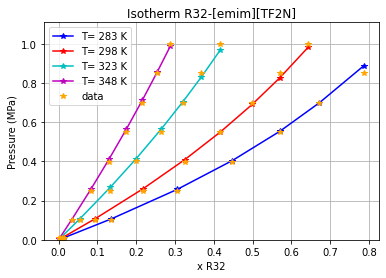

In [12]:
P1= np.zeros((len(P)))

for i in range(len(P)):
    P1[i] = P[i]/1e6

plt.plot(R32_x[0:7],P1[0:7],"b*-",label="T= 283 K")  
plt.plot(R32_x[7:15],P1[7:15],"r*-",label="T= 298 K") 
plt.plot(R32_x[15:23],P1[15:23],"c*-",label="T= 323 K") 
plt.plot(R32_x[23:31],P1[23:31],"m-*",label="T= 348 K")
plt.plot(data_full["x_R32"],data_full["pressure"]/1e6,"*",color='orange',label="data")  
plt.title('Isotherm R32-[emim][TF2N]')
plt.ylabel('Pressure (MPa)')
plt.xlabel('x R32')
plt.grid(True)
plt.ylim(0,1.110000)
plt.legend()
plt.show()

### Print Eigvals, Eigvectors

An identifiability analysis can be performed with these as well as a FIM because the covariance matrix is the inverse of the FIM. That means that if there are any eigvals > 0, their eigvecs indicate directions of un-identifiability.

In [13]:
eigvals, eigvecs = np.linalg.eig(cov)

In [14]:
eigvals

array([6.65927248e-04, 2.69512484e-07, 8.71404403e-05])

In [15]:
eigvecs

array([[-0.61563061, -0.68315192, -0.39281346],
       [-0.58395863,  0.06077453,  0.80950527],
       [ 0.52914202, -0.72774303,  0.43634712]])

In [16]:
np.savetxt('Data/EigenAnalysis/SRK_vals_3parameter_ILHFCB0.csv',eigvals,delimiter=',')
np.savetxt('Data/EigenAnalysis/SRK_vecs_3parameter_ILHFCB0.csv',eigvecs,delimiter=',')

Conclusion: Fully identifiable because all eigvals ~ 0

In [17]:
FIM = np.linalg.inv(cov) 

#A_opt
FIM_trace = np.trace(FIM)
cov_trace = np.trace(cov)

#D_opt
FIM_det = np.linalg.det(FIM)

#E_opt
eigvals_FIM, eigvecs_FIM = np.linalg.eig(FIM)
eigvals_FIM_min = eigvals_FIM.min()

np.savetxt('Data/EigenAnalysis/SRK_FIMtrdet_3parameter_ILHFCB0.csv',[cov_trace,FIM_trace,FIM_det,eigvals_FIM_min])
np.savetxt('Data/EigenAnalysis/SRK_FIMvals_3parameter_ILHFCB0.csv',eigvals_FIM,delimiter=',')
np.savetxt('Data/EigenAnalysis/SRK_FIMvecs_3parameter_ILHFCB0.csv',eigvecs_FIM,delimiter=',')

## AIC Value

See https://docs.google.com/document/d/1um0r2XK4ldjjy2colOqaZsEM3wIzGD6l_3B8gnpnI2I/edit# for equations

In [18]:
n = 3

In [19]:
SSR = obj_value

In [20]:
sigma_sq = SSR/n
sigma_sq

0.07136720460535696

In [21]:
L = -n/2*np.log(2*np.pi) - n/2*np.log(sigma_sq) - 1/(2*sigma_sq)*SSR
L

-0.296940348000964

In [22]:
AIC = 2*n - 2*L
AIC

6.5938806960019285

In [23]:
AIC_data = pd.DataFrame(data=[n,obj_value,AIC])
AIC_data = AIC_data.T
AIC_data.columns = ['n','Objective, Pa^2','AIC']
AIC_data.to_csv('Data/AIC/SRK_AIC_3parameter_ILHFCB0.csv')